In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükleme

In [3]:
df = pd.read_csv("C:/Users/merve/OneDrive/Masaüstü/e_commerce_analysis_pipline_project/data/raw/sales_data.csv")

# İlk 5 satırı görüntüleme

In [4]:
df.head()

,id,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Veri seti hakkında genel bilgiler

In [ ]:
df.info

<bound method DataFrame.info of             id invoiceno stockcode                          description  \
0            1    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            2    536365     71053                  WHITE METAL LANTERN   
2            3    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3            4    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            5    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...       ...       ...                                  ...   
541904  541905    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
541905  541906    581587     22899         CHILDREN'S APRON DOLLY GIRL    
541906  541907    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
541907  541908    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
541908  541909    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        quantity          invoicedate  unitprice  customerid       

# Temel istatistiksel özet

In [15]:
df.describe

<bound method NDFrame.describe of             id invoiceno stockcode                          description  \
0            1    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            2    536365     71053                  WHITE METAL LANTERN   
2            3    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3            4    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            5    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...       ...       ...                                  ...   
541904  541905    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
541905  541906    581587     22899         CHILDREN'S APRON DOLLY GIRL    
541906  541907    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
541907  541908    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
541908  541909    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        quantity          invoicedate  unitprice  customerid     

# Eksik değerlerin analizi

In [16]:
missing_values = df.isnull().sum()
print("Eksik Değerler:\n", missing_values[missing_values > 0])

Eksik Değerler:
 description      1454
customerid     135080
dtype: int64


# Histogram grafiği

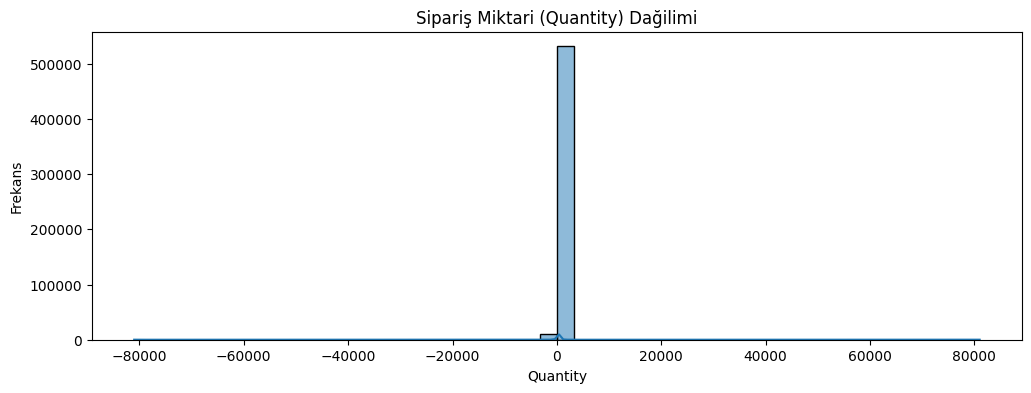

In [52]:
plt.figure(figsize=(12, 4))
sns.histplot(df["quantity"], bins=50, kde=True)
plt.title("Sipariş Miktari (Quantity) Dağilimi")
plt.xlabel("Quantity")
plt.ylabel("Frekans")
plt.show()

 Yukarıdaki histogram grafiğine göre: Veri setinde aşırı uç değerler (outliers) var ve dağılımın aşırı sağa çarpık olduğunu gösteriyor.

# Aykırı Değer Analizi (Boxplot)

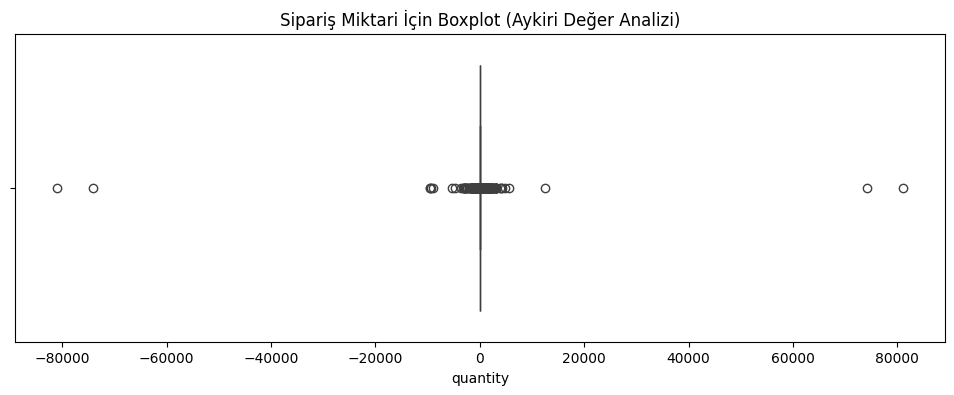

In [51]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df["quantity"])
plt.title("Sipariş Miktari İçin Boxplot (Aykiri Değer Analizi)")
plt.show()

# Yukarıdaki boxplot grafiğine göre:

Veri setinde aşırı uç değerler (outliers) olduğu açıkça görülüyor.
Sipariş miktarlarının büyük bir kısmı 0 civarında yoğunlaşmış, ancak hem negatif hem de pozitif uçlarda aşırı büyük değerler mevcut.
Negatif uç değerler genellikle iade edilen siparişleri temsil eder.
Pozitif uç değerler, muhtemelen toplu siparişler veya hatalı veri girişleri olabilir.

Sonraki Adım:
Aykırı değerleri filtreleyerek daha güvenilir bir analiz elde edilebilir.
IQR (Interquartile Range) yöntemi ile uç değerleri belirleyip temizlemek mantıklı olabilir.

# Aykırı Değerleri Filtreleme

In [32]:
q1 = df["quantity"].quantile(0.25)
q3 = df["quantity"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr  # Alt sınır
upper_bound = q3 + 1.5 * iqr  # Üst sınır

df_filtered = df[(df["quantity"] > lower_bound) & (df["quantity"] < upper_bound)]

# Filtrelenmiş Verinin Boxplot'u (Aykırı Değerler Temizlendikten Sonra)


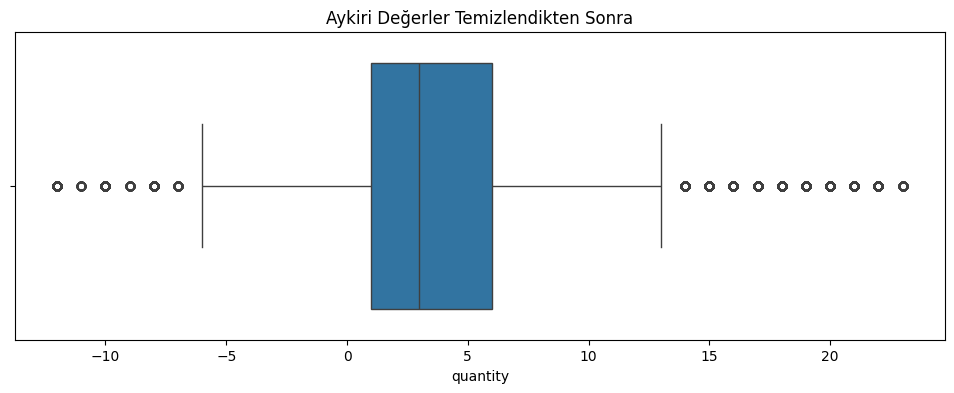

In [50]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_filtered["quantity"])
plt.title("Aykiri Değerler Temizlendikten Sonra")
plt.show()

Yukarıdaki boxplot grafiğine göre:

Aykırı değerler (outliers) temizlendikten sonra veri daha dengeli bir dağılım gösteriyor.
Medyan (ortadaki çizgi) veri setinin ortasına daha yakın ve kuyruklar daha kısa, bu da uç değerlerin etkisinin azaldığını gösteriyor.
Hala bazı uç noktalar mevcut, ancak önceki grafiğe kıyasla dağılım daha doğal ve güvenilir hale geldi.

Sonraki Adım:
Bu temizlenmiş veri ile modelleri yeniden eğitmek, daha doğru tahminler yapmaya yardımcı olabilir.

# Güncellenmiş Histogram

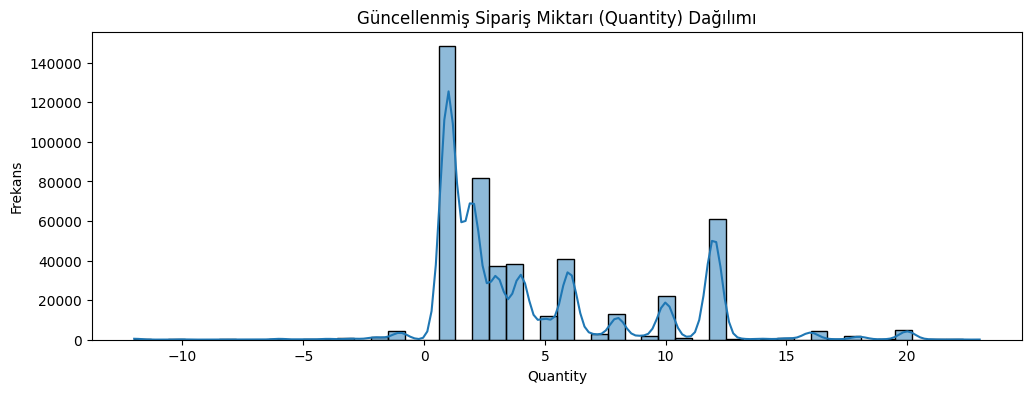

In [ ]:
plt.figure(figsize=(12, 4))
sns.histplot(df_filtered["quantity"], bins=50, kde=True)
plt.title("Güncellenmiş Sipariş Miktari (Quantity) Dağilimi")
plt.xlabel("Quantity")
plt.ylabel("Frekans")
plt.show()

# Yukarıdaki güncellenmiş histogram grafiğine göre:

Aykırı değerler temizlendikten sonra dağılım çok daha anlamlı hale gelmiş.
En büyük yoğunluk 1 ve 2 birim siparişlerde, bu da küçük miktarlı siparişlerin daha yaygın olduğunu gösteriyor.
Negatif değerler hala mevcut, bu durum iade edilen ürünleri veya yanlış girişleri gösterebilir.
Dağılım sağa çarpık, yani bazı yüksek sipariş miktarları mevcut ama bunlar nadir.

Sonraki Adım:
Negatif değerleri daha detaylı incelemek, bunların iadeler mi yoksa yanlış girişler mi olduğunu belirlemek.
Sipariş miktarına göre müşteri segmentasyonu yapmak, düşük ve yüksek siparişli müşterileri analiz etmek.
Zaman serisi analizi ile sipariş eğilimlerini gözlemlemek.

# Müşteri segmentlerini belirleme

In [55]:
from sklearn.cluster import KMeans

# Müşteri bazında sipariş istatistikleri
customer_orders = df_filtered.groupby("customerid").agg(
    total_orders=("quantity", "sum"),  # Toplam sipariş miktarı
    order_count=("invoiceno", "nunique"),  # Sipariş edilen fatura sayısı
    avg_order_size=("quantity", "mean")  # Ortalama sipariş büyüklüğü
).reset_index()

# İlk 5 satırı görüntüleyelim
customer_orders.head()



,customerid,total_orders,order_count,avg_order_size
0,12347.0,1300,7,8.843537
1,12348.0,29,4,5.800000
2,12349.0,485,1,7.132353
3,12350.0,173,1,10.812500
4,12352.0,470,11,4.947368


In [56]:
# Sipariş miktarına göre segmentleri belirleme
customer_orders["segment"] = pd.cut(
    customer_orders["total_orders"],
    bins=[0, 50, 500, float("inf")],  # Eşik değerler
    labels=["Küçük Müşteri", "Orta Müşteri", "Büyük Müşteri"]
)

# Segment bazında istatistikleri görüntüleyelim
customer_orders.groupby("segment").agg({"total_orders": ["count", "mean", "min", "max"]})


C:\Users\merve\AppData\Local\Temp\ipykernel_24624\1558625950.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_orders.groupby("segment").agg({"total_orders": ["count", "mean", "min", "max"]})


total_orders                         
                     count         mean  min    max
segment                                            
Küçük Müşteri          535    27.233645    1     50
Orta Müşteri          2602   203.800538   51    500
Büyük Müşteri         1060  1274.800943  501  34975

Müşteriler sipariş miktarlarına göre 3 gruba ayrılmıştır:
Küçük Müşteriler (0-50 ürün siparişi verenler)
Orta Müşteriler (51-500 ürün siparişi verenler)
Büyük Müşteriler (500+ ürün siparişi verenler)

Küçük müşteri grubu en fazla müşteriye sahip olsa da ortalama sipariş hacmi oldukça düşüktür (27.23 ürün).
Büyük müşteri grubu, az sayıda müşteriden oluşmasına rağmen, ortalama sipariş miktarı 1274.8 ürün ile oldukça yüksektir.
Orta müşteri grubu en dengeli dağılıma sahiptir ve müşteri sadakati açısından önemli olabilir.

C:\Users\merve\AppData\Local\Temp\ipykernel_24624\3357193554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["total_price"] = df_filtered["quantity"] * df_filtered["unitprice"]
C:\Users\merve\AppData\Local\Temp\ipykernel_24624\3357193554.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_revenue = customer_orders.groupby("segment")["total_revenue"].agg(["sum", "mean", "count"]).reset_index()
C:\Users\merve\AppData\Local\Temp\ipykernel_24624\3357193554.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

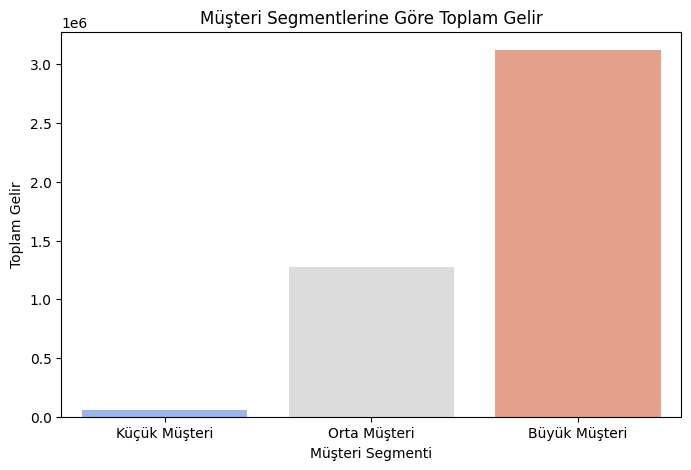

In [58]:
# Toplam harcama sütunu ekleme
df_filtered["total_price"] = df_filtered["quantity"] * df_filtered["unitprice"]

# Müşteri bazında toplam harcamayı hesaplama
customer_orders["total_revenue"] = df_filtered.groupby("customerid")["total_price"].sum().values

# Segment bazında toplam geliri hesaplama
segment_revenue = customer_orders.groupby("segment")["total_revenue"].agg(["sum", "mean", "count"]).reset_index()

# Sonuçları görüntüleme
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=segment_revenue, x="segment", y="sum", palette="coolwarm")
plt.title("Müşteri Segmentlerine Göre Toplam Gelir")
plt.xlabel("Müşteri Segmenti")
plt.ylabel("Toplam Gelir")
plt.show()


Toplam harcama, sipariş edilen miktar (quantity) ile birim fiyat (unitprice) çarpılarak hesaplanabilir.Total Revenue=quantity×unitprice

Büyük Müşteriler, toplam gelirin büyük bir kısmını oluşturuyor. Bu segment, işletmenin gelirinin büyük bölümünü sağlıyor ve bu müşterilere yönelik özel teklifler, sadakat programları ve kişiselleştirilmiş kampanyalar sunulabilir.

Orta Müşteriler, toplam gelirin önemli bir kısmına katkı sağlasa da, büyük müşterilere kıyasla daha düşük bir seviyede kalmaktadır. Bu grubu büyük müşteri segmentine taşımak için indirim stratejileri uygulanabilir.

Küçük Müşteriler, en düşük gelir seviyesinde yer almaktadır. Bu segmentin gelirini artırmak için ilk sipariş indirimleri, ücretsiz kargo veya düşük bütçeli promosyonlar gibi teşvikler sunulabilir.

# Quantity'nin Kategorik Değişkenlerle İlişkisi

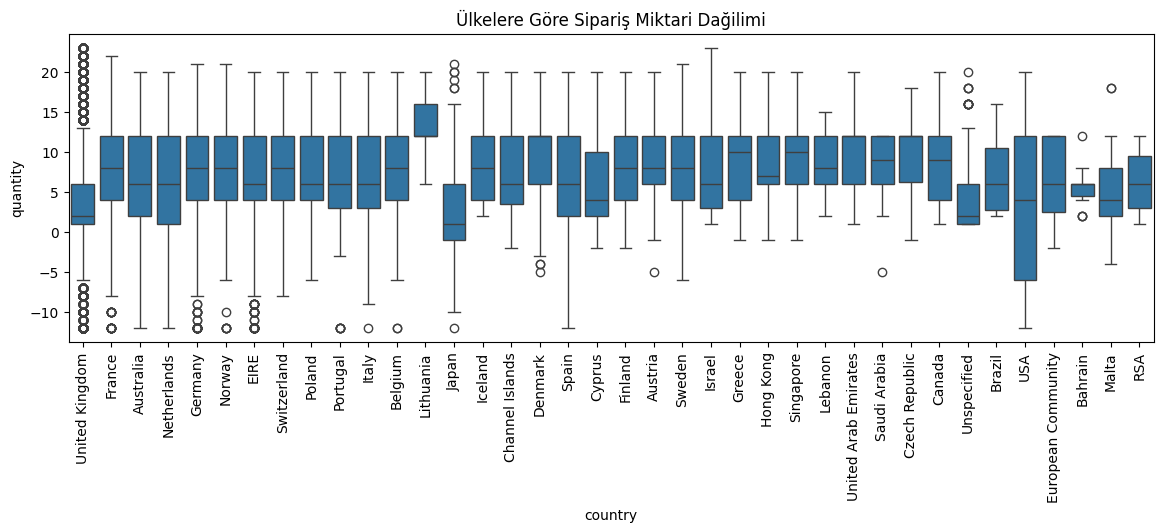

In [45]:
plt.figure(figsize=(14, 4))
sns.boxplot(x="country", y="quantity", data=df_filtered)
plt.xticks(rotation=90)
plt.title("Ülkelere Göre Sipariş Miktari Dağilimi")
plt.show()

Yukarıdaki boxplot, ülkeler bazında sipariş miktarlarının dağılımını göstermektedir.

Birleşik Krallık (United Kingdom), en geniş dağılıma sahip ülke olarak öne çıkmaktadır. Bu, Birleşik Krallık’taki sipariş miktarlarının oldukça değişken olduğunu ve bazı büyük siparişlerin bulunduğunu göstermektedir.

Fransa, Almanya, Hollanda ve Avustralya gibi ülkelerde sipariş dağılımı daha dar bir aralıkta kalırken, medyan değerin genellikle düşük olduğu görülmektedir. Bu ülkelerde müşteri sipariş miktarları daha istikrarlı olabilir.
Bazı ülkelerde negatif değerler gözlemlenmektedir. Bunlar muhtemelen iade edilen ürünleri temsil etmektedir ve özellikle Birleşik Krallık’ta daha yaygın olduğu görülmektedir.

Aykırı değerler çoğu ülkede bulunmaktadır.

Küçük pazarlar (örneğin Malta, Bahreyn, Lübnan) genellikle düşük sipariş hacmine sahip olup, büyük siparişlerin nadir olduğu görülmektedir.

# Korelasyon matrisi

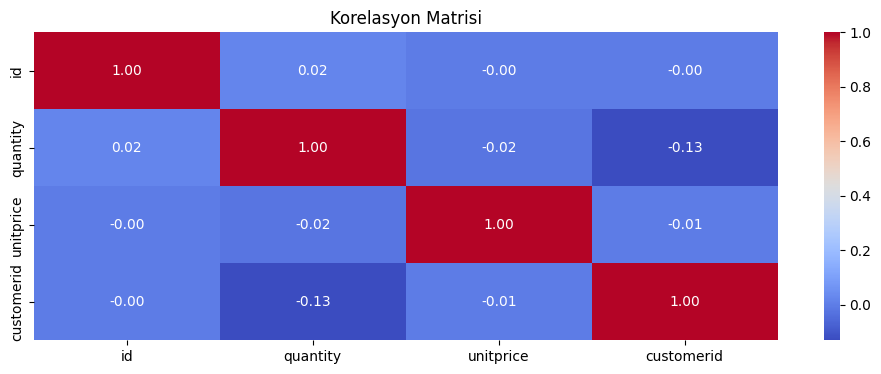

In [53]:
plt.figure(figsize=(12, 4))

# Sadece sayısal değişkenleri seç
numeric_df = df_filtered.select_dtypes(include=["number"])

# Korelasyon matrisi çiz
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Korelasyon Matrisi")
plt.show()


Quantity (sipariş miktarı) ile UnitPrice (birim fiyat) arasındaki korelasyon -0.02, yani neredeyse yok denecek kadar zayıf bir ilişki var. Bu, ürün fiyatlarının sipariş miktarını doğrudan etkilemediğini gösteriyor olabilir.

CustomerID ile diğer değişkenler arasındaki korelasyon düşük. Bu, müşteri kimlik numarasının diğer değişkenlerle doğrudan bir ilişkisinin olmadığını gösteriyor ki bu beklenen bir durumdur.

UnitPrice (Birim Fiyat) ve Quantity (Sipariş Miktarı) arasında negatif bir ilişki var. Ancak korelasyon çok düşük olduğu için fiyat arttıkça sipariş miktarının düştüğünü net bir şekilde söyleyemeyiz.

Değişkenler arasında güçlü doğrusal bir ilişki bulunmuyor. Bu durumda ek değişkenler türetmek veya farklı analiz yöntemleri denemek daha anlamlı olabilir.

Sipariş miktarı ve fiyat arasındaki ilişkiyi detaylandırmak için müşteri segmentlerine göre korelasyon analizi yapılabilir.

Zayıf korelasyonlar nedeniyle, regresyon gibi tahmin modelleri için ek değişkenler oluşturmak faydalı olabilir.
Farklı segmentlere (örneğin büyük müşteriler ve küçük müşteriler) göre korelasyonları ayrı ayrı incelemek daha anlamlı sonuçlar verebilir.


# Her segment için korelasyonu hesaplama ve görselleştirme

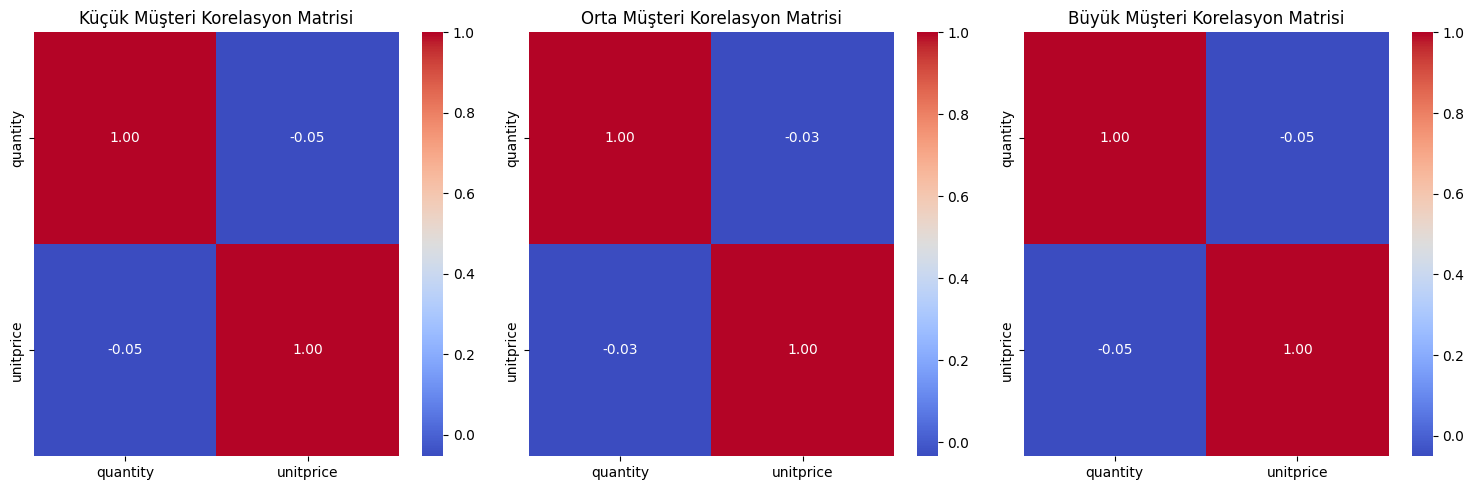

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt


segments = ["Küçük Müşteri", "Orta Müşteri", "Büyük Müşteri"]

plt.figure(figsize=(15, 5))

for i, segment in enumerate(segments, 1):
    segment_df = df_filtered[df_filtered["customerid"].isin(customer_orders[customer_orders["segment"] == segment]["customerid"])]
    
    # Sayısal değişkenleri seç
    numeric_segment_df = segment_df[["quantity", "unitprice"]]

    # Korelasyon matrisini çiz
    plt.subplot(1, 3, i)
    sns.heatmap(numeric_segment_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"{segment} Korelasyon Matrisi")

plt.tight_layout()
plt.show()


Fiyat değişiklikleri, sipariş miktarında belirgin bir farklılık yaratmıyor gibi görünüyor. Müşterilerin fiyat duyarlılığının düşük gibi görünüyor.

Farklı pazarlama stratejileri denenebilir:
Birim fiyat yerine toplam harcama bazlı indirimler uygulanabilir. Örneğin, toplam alışveriş tutarına göre indirim sağlayarak, fiyattan bağımsız bir şekilde müşteri sadakati artırılabilir. 
Büyük müşterilere özel ayrı fiyatlandırma stratejileri geliştirilebilir. Büyük müşteriler genellikle daha büyük hacimli siparişler verdiği için toplu siparişlerde özel fiyatlandırma sağlanabilir.

# Zaman Serisi Analizi

C:\Users\merve\AppData\Local\Temp\ipykernel_24624\2996311521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["invoicedate"] = pd.to_datetime(df_filtered["invoicedate"])
C:\Users\merve\AppData\Local\Temp\ipykernel_24624\2996311521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["month"] = df_filtered["invoicedate"].dt.to_period("M")  # Aylık gruplama


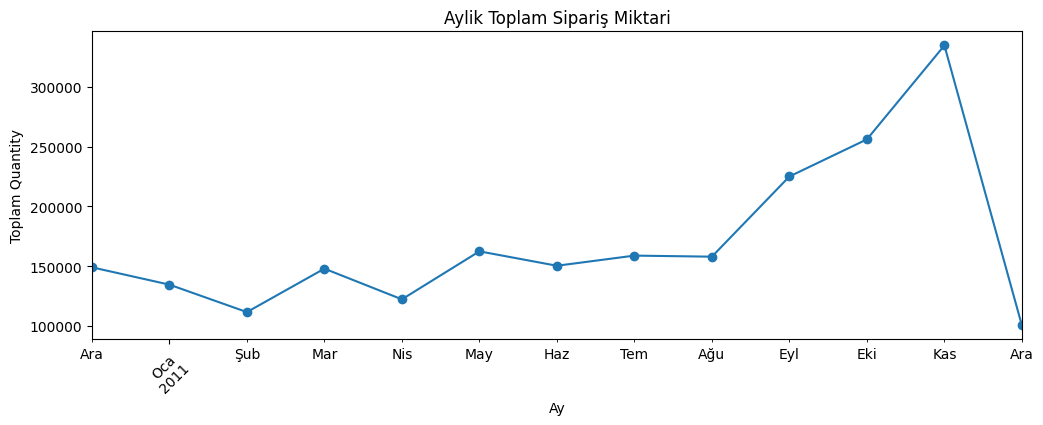

In [54]:
df_filtered["invoicedate"] = pd.to_datetime(df_filtered["invoicedate"])
df_filtered["month"] = df_filtered["invoicedate"].dt.to_period("M")  # Aylık gruplama

plt.figure(figsize=(12, 4))
df_filtered.groupby("month")["quantity"].sum().plot(kind="line", marker="o")
plt.title("Aylik Toplam Sipariş Miktari")
plt.xlabel("Ay")
plt.ylabel("Toplam Quantity")
plt.xticks(rotation=45)
plt.show()

Sipariş miktarında belirgin bir artış eğilimi gözlemleniyor.

Yılın başlarında (Ocak-Mayıs arası) göreceli olarak düşük sipariş varken, yılın ilerleyen aylarında özellikle Eylül-Kasım arasında ciddi bir artış gözlemleniyor.
Kasım ayı siparişlerde zirve noktası.

Bu dönem alışveriş kampanyaları, indirim sezonları (örneğin Black Friday) veya yıl sonu talepleri nedeniyle büyük bir artış göstermiş olabilir.
Kasım ayı en yüksek sipariş miktarına sahip dönemdir.
Aralık ayında sipariş miktarı ani bir şekilde düşüş gösteriyor.

Bu düşüş, yılbaşı öncesi stokların tamamlanması, kampanyaların bitmesi veya tatil dönemlerinin etkisi olabilir.
Aralık ayı için özel kampanyalar veya stratejiler geliştirerek düşüş minimize edilebilir.
Haziran-Temmuz aylarında stabil bir seyir var.

Bu dönemlerde sipariş miktarında büyük dalgalanmalar yok. Yaz aylarında alışverişleR daha durağan.

In [7]:
print(df["quantity"].describe())
print(df["quantity"].value_counts())


count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64
quantity
 1       148227
 2        81829
 12       61063
 6        40868
 4        38484
          ...  
-355          1
-155          1
 1404         1
 388          1
 490          1
Name: count, Length: 722, dtype: int64


# Hiperparameter Tuning 

In [63]:
import pandas as pd
import numpy as np
import yaml
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# Veriyi Yükle
df = pd.read_csv("C:/Users/merve/OneDrive/Masaüstü/e_commerce_analysis_pipline_project/data/processed/train_data.csv")

X = df.drop(columns=["quantity"])
y = df["quantity"]

# Train-Test Ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Hiperparametre Grid Search Ayarları
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 9]
}

#  GridSearchCV ile En İyi Parametreleri Bul
xgb = XGBRegressor()
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring="neg_mean_absolute_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

#  En İyi Sonuçlar
best_params = grid_search.best_params_
print(f" En iyi XGBoost parametreleri: {best_params}")

#  Test Sonuçlarını Değerlendir
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f" MAE: {mae:.4f}, RMSE: {rmse:.4f}")


 En iyi XGBoost parametreleri: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200}
 MAE: 0.3877, RMSE: 0.5970
